## Import libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [108]:
csv_file = 'superstore.csv'
dataset = pd.read_csv(csv_file)
dataset.describe()

,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


## Clean data

### Managing null values

In [109]:
#Check for null values
dataset.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

There are no null values

### Managing duplicate values

In [110]:
#Checking for duplicate values
dataset.duplicated().value_counts()

False    51290
Name: count, dtype: int64

There are no duplicate values

### Detect and handle outliers using zscores

In [112]:
#Function to find row indices of outliers in a column
threshold_z = 3
def outlier_indices(column_name):
    column = dataset[column_name]
    mean = column.mean()
    std_dev = column.std()
    zscores = (column - mean)/std_dev
    abs_zscores = np.abs(zscores)
    indices = np.where(abs_zscores > threshold_z)[0]
    return indices

In [113]:
#Getting numerical columns
numeric_columns = dataset.select_dtypes(include='number')
print(numeric_columns)

       Discount   Profit  Quantity  Row.ID  Sales  Shipping.Cost  Year  \
0           0.0   9.3312         3   36624     19           4.37  2011   
1           0.0   9.2928         2   37033     19           0.94  2011   
2           0.0   9.8418         3   31468     21           1.81  2011   
3           0.0  53.2608         2   31469    111           4.59  2011   
4           0.0   3.1104         1   32440      6           1.32  2011   
...         ...      ...       ...     ...    ...            ...   ...   
51285       0.2  22.5732         2   33646     69           5.15  2014   
51286       0.2   3.1584         6   33645      9           0.44  2014   
51287       0.2   4.2804         2   32321     12           0.31  2014   
51288       0.2  33.9300         3   35917     90          15.95  2014   
51289       0.2  51.8238         3   37371    154           9.59  2014   

       weeknum  
0            2  
1            4  
2           32  
3           32  
4           40  
...      

In [114]:
#Dropping irrelevant columns for detecting outliers
numeric_columns.drop(['Row.ID','Year','weeknum'],inplace=True,axis=1)
print(numeric_columns)

       Discount   Profit  Quantity  Sales  Shipping.Cost
0           0.0   9.3312         3     19           4.37
1           0.0   9.2928         2     19           0.94
2           0.0   9.8418         3     21           1.81
3           0.0  53.2608         2    111           4.59
4           0.0   3.1104         1      6           1.32
...         ...      ...       ...    ...            ...
51285       0.2  22.5732         2     69           5.15
51286       0.2   3.1584         6      9           0.44
51287       0.2   4.2804         2     12           0.31
51288       0.2  33.9300         3     90          15.95
51289       0.2  51.8238         3    154           9.59

[51290 rows x 5 columns]


In [115]:
#Removing outliers
indices = set()
for i in numeric_columns:
    indices.update(outlier_indices(i)) #Getting outlier indices
dataset.drop(indices,axis=0,inplace=True)
dataset.describe()

,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,48701.000000,48701.000000,48701.000000,48701.000000,48701.000000,48701.000000,48701.000000,48701.000000
mean,0.138768,20.782436,3.290158,25616.274142,182.014784,18.629629,2012.778013,31.275107
std,0.206512,82.307325,2.022546,14883.435430,254.687646,28.612901,1.097609,14.423074
min,0.000000,-493.320000,1.000000,1.000000,1.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,12661.000000,30.000000,2.510000,2012.000000,20.000000
50%,0.000000,8.880000,3.000000,25576.000000,79.000000,7.236000,2013.000000,33.000000
75%,0.200000,33.150000,4.000000,38576.000000,220.000000,21.300000,2014.000000,44.000000
max,0.700000,551.196000,10.000000,51290.000000,1708.000000,198.020000,2014.000000,53.000000


### Computing correlations between numerical columns

In [116]:
dataset.corr(numeric_only=True)

,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
Discount,1.000000,-0.449600,-0.029396,0.077062,-0.113381,-0.098545,-0.004138,-0.001191
Profit,-0.449600,1.000000,0.111550,-0.034559,0.437532,0.363133,0.003203,0.004082
Quantity,-0.029396,0.111550,1.000000,-0.201454,0.289784,0.244809,-0.006476,0.024449
Row.ID,0.077062,-0.034559,-0.201454,1.000000,-0.080425,-0.068866,-0.000291,-0.030286
Sales,-0.113381,0.437532,0.289784,-0.080425,1.000000,0.812451,-0.006427,0.003660
Shipping.Cost,-0.098545,0.363133,0.244809,-0.068866,0.812451,1.000000,-0.004067,0.003766
Year,-0.004138,0.003203,-0.006476,-0.000291,-0.006427,-0.004067,1.000000,-0.017857
weeknum,-0.001191,0.004082,0.024449,-0.030286,0.003660,0.003766,-0.017857,1.000000


The correlation matrix shows that sales and shipping cost have a good linear relationship between them. Other columns don't have a good linear relationship among them.

## Data Visualization

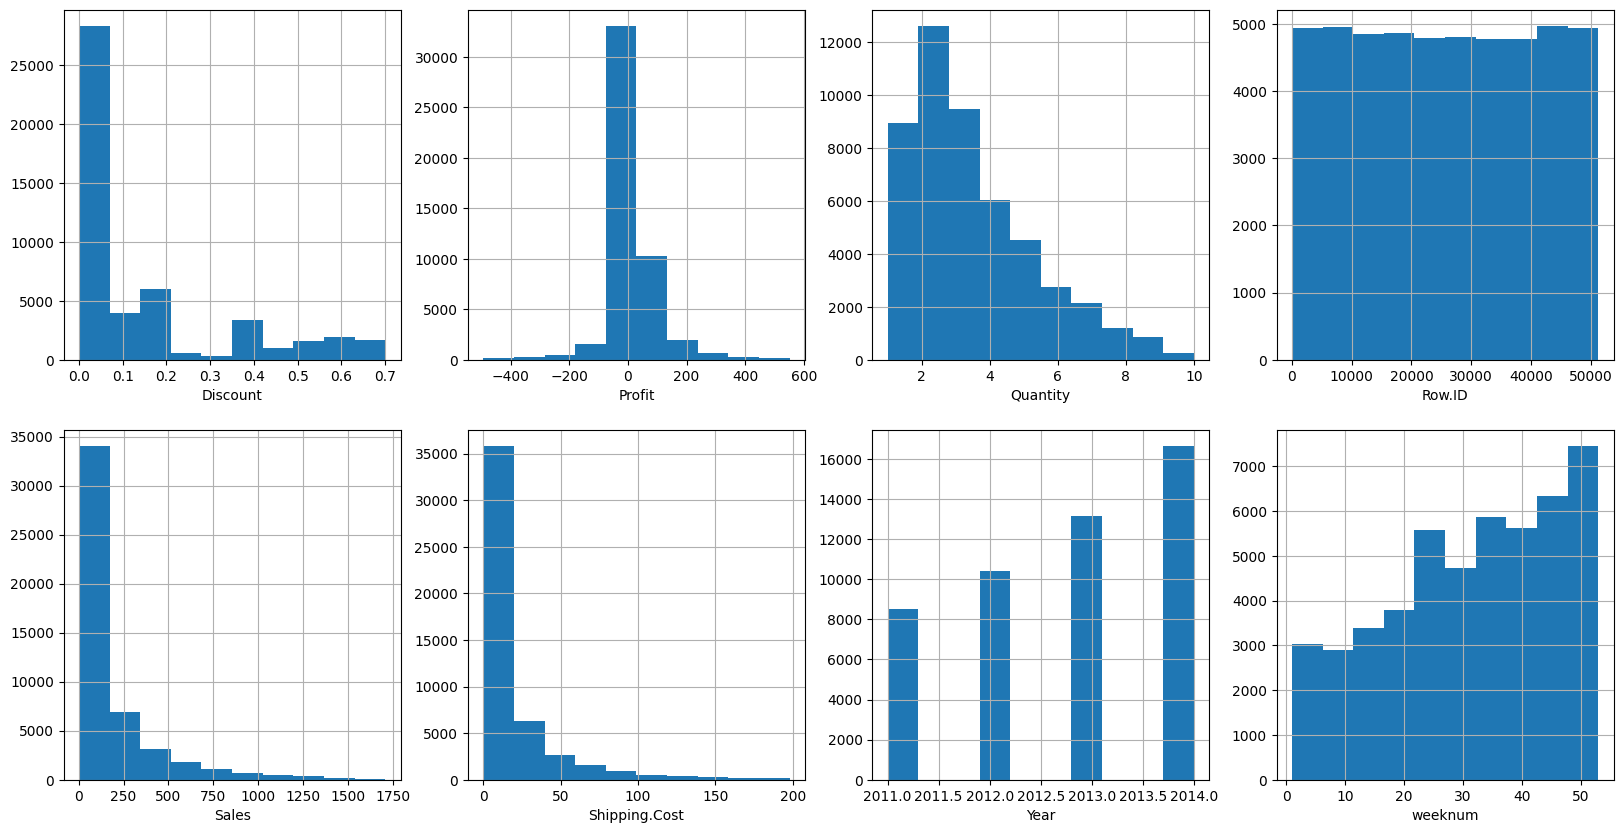

In [117]:
#Histograms to observe data distribution
plt.figure(figsize=(20,10))
numeric_columns = dataset.select_dtypes(include='number').columns
for i in  range(1,len(numeric_columns)+1):
    plt.subplot(2,4,i)
    plt.xlabel(numeric_columns[i-1])
    dataset[numeric_columns[i-1]].hist()
plt.show()

From the histograms, the values of discount, quantity, sales and shipping cost follow an exponentially decreasing pattern. Profit follows a normal distribution.

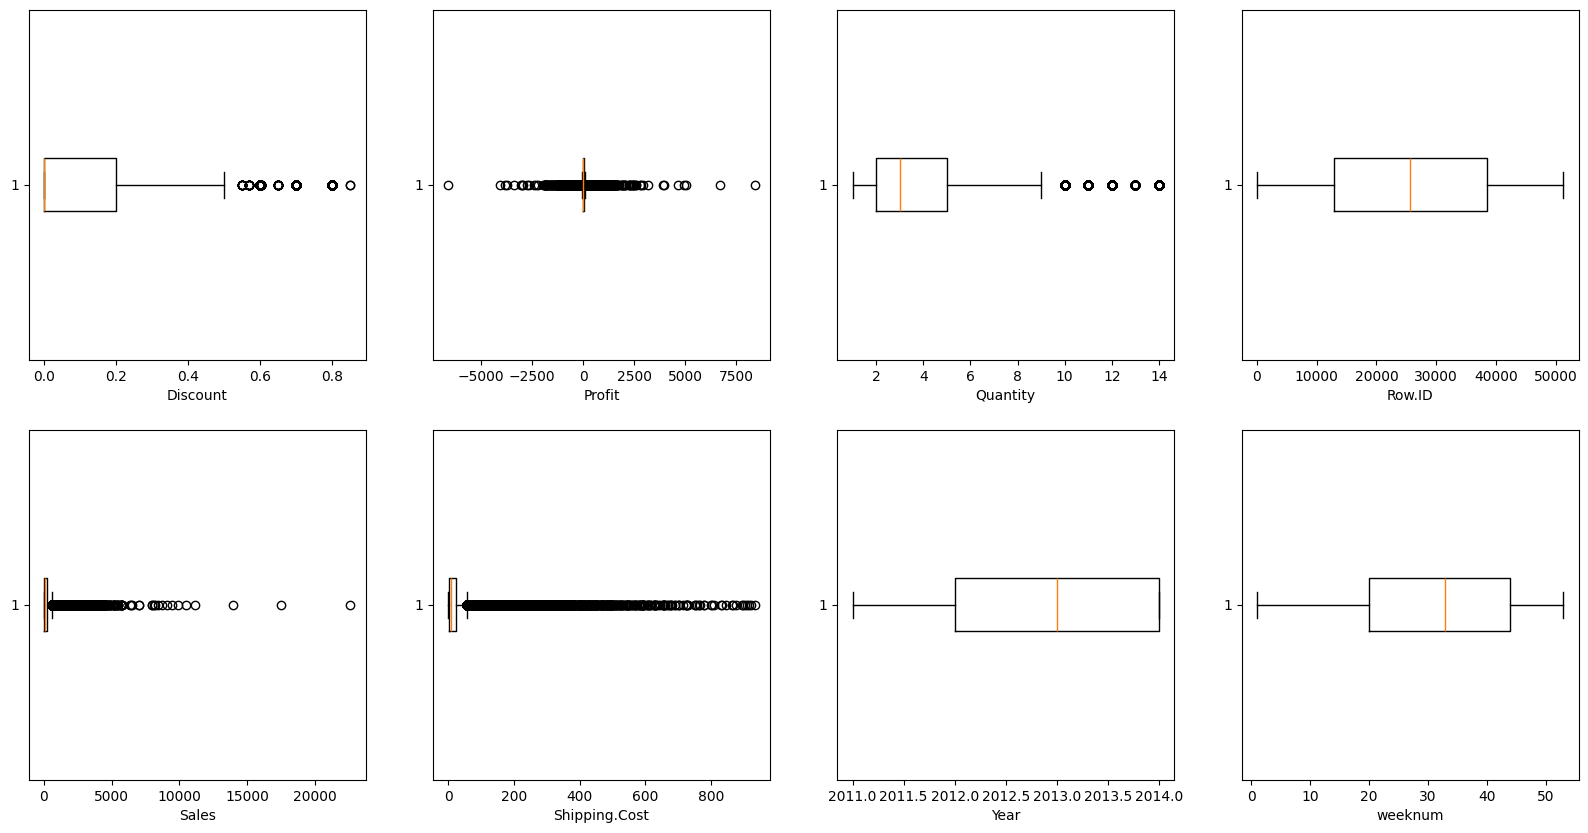

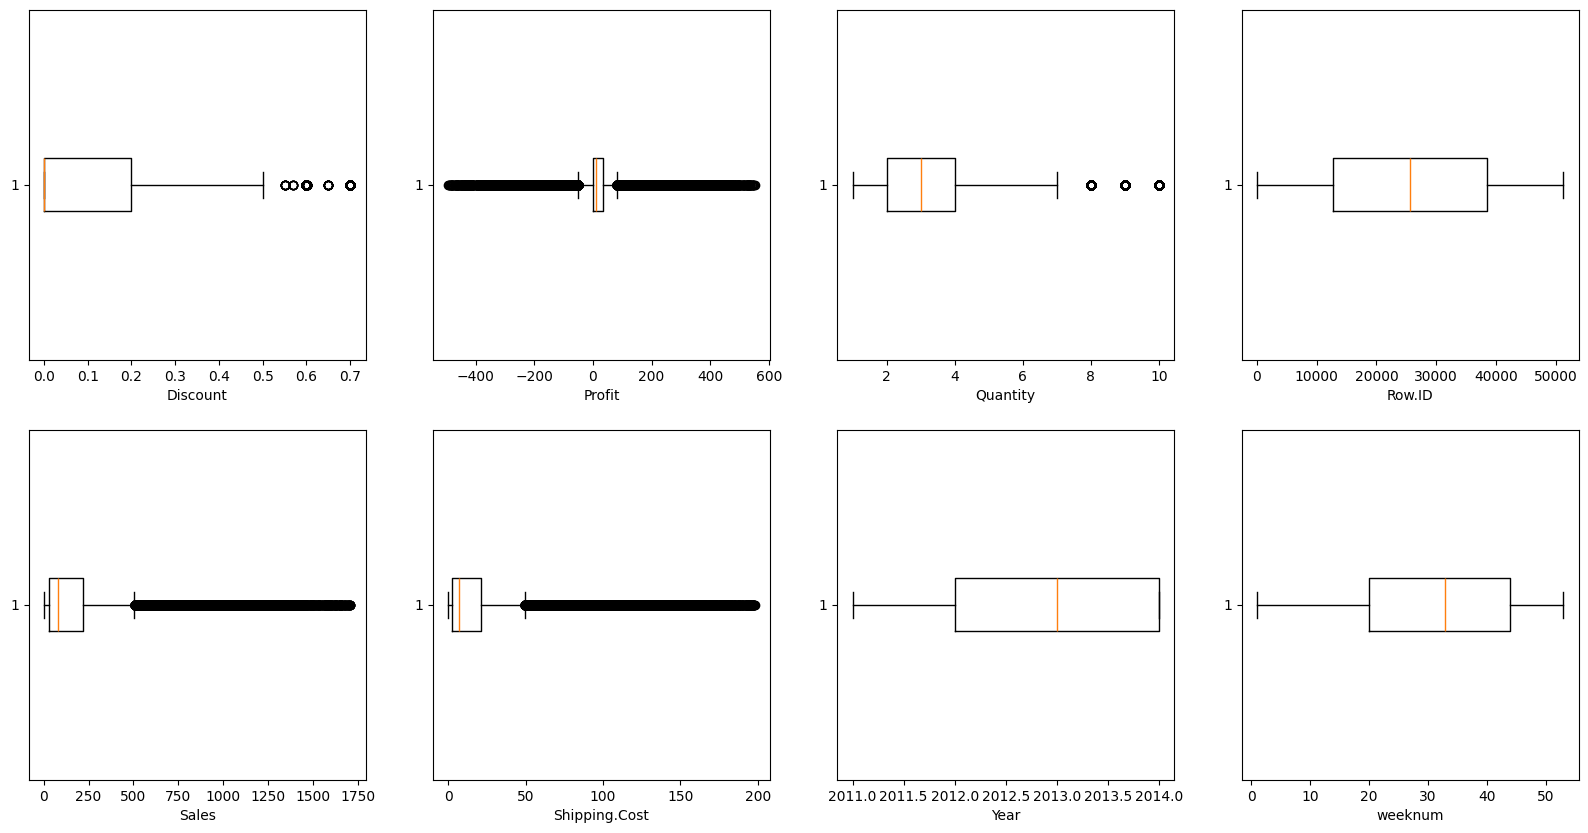

In [118]:
#boxplots to detect outliers
original_data = pd.read_csv('superstore.csv')
plt.figure(figsize=(20,10))
for i in  range(1,len(numeric_columns)+1):
    plt.subplot(2,4,i)
    plt.xlabel(numeric_columns[i-1])
    plt.boxplot(x=original_data[numeric_columns[i-1]],vert=False)
plt.figure(figsize=(20,10))
for i in  range(1,len(numeric_columns)+1):
    plt.subplot(2,4,i)
    plt.xlabel(numeric_columns[i-1])
    plt.boxplot(x=dataset[numeric_columns[i-1]],vert=False)
plt.show()

From boxplots for original data, we can see that there are ouliers in discount, sales, quantity, profit and shpping cost columns. From boxplots for cleaned data, we can say that there are still outliers in the above 5 columns. But there are less outliers in the cleaned dataset.

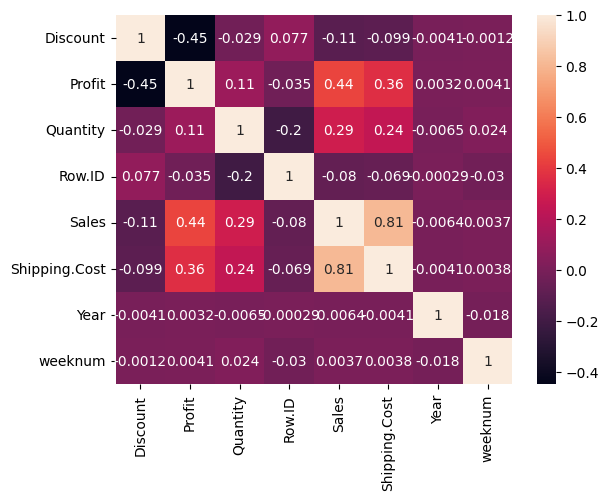

In [119]:
#Visualization of corraltion between columns
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

The correlation heatmap shows that sales and shipping cost have a good linear relationship between them. Other columns don't have a good linear relationship among them.